In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
features = pd.read_csv('../data/descriptors/reaction_descriptors.csv')

In [4]:
print(features.columns)

Index(['unique_reaction_id', 'original_reaction_id', 'source',
       'reactant_0_num_atoms', 'reactant_0_num_bonds', 'reactant_0_MolWt',
       'reactant_0_NumHDonors', 'reactant_0_NumHAcceptors',
       'reactant_0_atom_features', 'reactant_0_bond_features',
       'reactant_1_num_atoms', 'reactant_1_num_bonds', 'reactant_1_MolWt',
       'reactant_1_NumHDonors', 'reactant_1_NumHAcceptors',
       'reactant_1_atom_features', 'reactant_1_bond_features',
       'product_0_num_atoms', 'product_0_num_bonds', 'product_0_MolWt',
       'product_0_NumHDonors', 'product_0_NumHAcceptors',
       'product_0_atom_features', 'product_0_bond_features',
       'product_1_num_atoms', 'product_1_num_bonds', 'product_1_MolWt',
       'product_1_NumHDonors', 'product_1_NumHAcceptors',
       'product_1_atom_features', 'product_1_bond_features'],
      dtype='object')


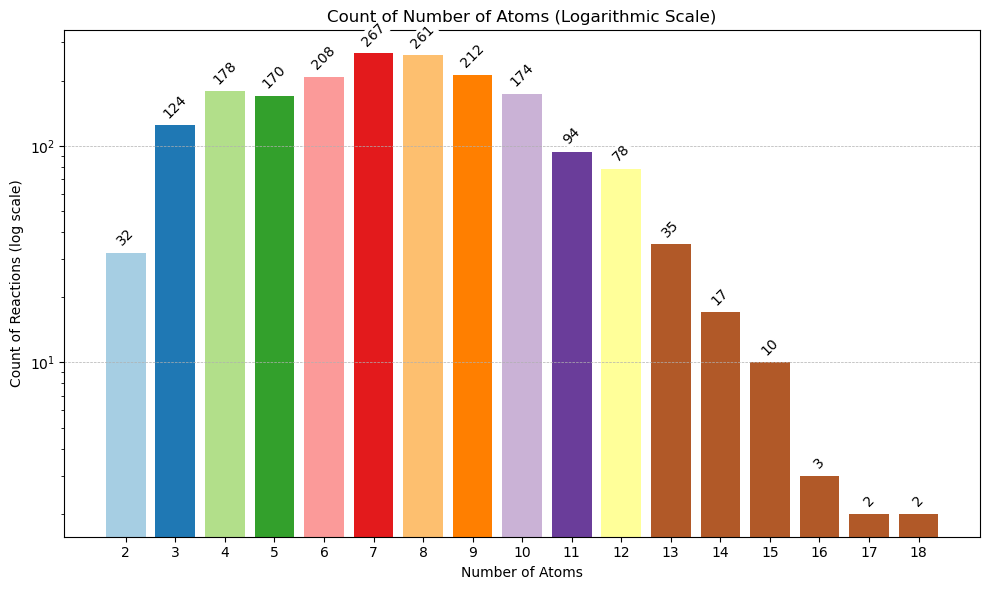

In [26]:
# num of atoms
num_atoms = features['reactant_0_num_atoms'] + features['reactant_1_num_atoms']
# Get a count of num of atoms from 1 to 10
num_atoms_counts = num_atoms.value_counts().sort_index()

# Sorting the dictionary by keys
num_atoms_counts = dict(sorted(num_atoms_counts.items()))

plt.figure(figsize=(10, 6))  # Increase figure size for more spacing
bars = plt.bar(num_atoms_counts.keys(), num_atoms_counts.values(), color=plt.cm.Paired(range(len(num_atoms_counts))))
plt.xlabel('Number of Atoms')
plt.ylabel('Count of Reactions (log scale)')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Count of Number of Atoms (Logarithmic Scale)')
plt.xticks(list(num_atoms_counts.keys()))
plt.grid(axis='y', linestyle='--', linewidth=0.5)  # Add gridlines for the y-axis

# Add count labels above each bar with larger font, white background, and slight diagonal rotation
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval * 1.05, int(yval),  # Adjust label position slightly higher
             ha='center', va='bottom', fontsize=10, rotation=45,
             bbox=dict(facecolor='white', edgecolor='none', pad=1.5))  # White background box

plt.tight_layout()
plt.show()

In [29]:
features_df = features.copy()
# Calculate the absolute difference
features_df['atoms_diff_abs'] = features_df['reactant_0_num_atoms'] - features_df['reactant_1_num_atoms']

# Calculate the relative difference (percentage)
features_df['atoms_diff_rel'] = features_df['atoms_diff_abs'] / features_df['reactant_1_num_atoms']

# Also calculate the absolute difference in number of bonds
features_df['bonds_diff_abs'] = features_df['reactant_0_num_bonds'] - features_df['reactant_1_num_bonds']

# Relative difference in number of bonds
features_df['bonds_diff_rel'] = features_df['bonds_diff_abs'] / features_df['reactant_1_num_bonds']

# Replace zeros with NaN to avoid division by zero
features_df['reactant_1_num_atoms'].replace(0, np.nan, inplace=True)
features_df['reactant_1_num_bonds'].replace(0, np.nan, inplace=True)

# Recalculate relative differences
features_df['atoms_diff_rel'] = features_df['atoms_diff_abs'] / features_df['reactant_1_num_atoms']
features_df['bonds_diff_rel'] = features_df['bonds_diff_abs'] / features_df['reactant_1_num_bonds']

/tmp/ipykernel_2403248/765521501.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_df['reactant_1_num_atoms'].replace(0, np.nan, inplace=True)
/tmp/ipykernel_2403248/765521501.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [30]:
# Absolute differences in number of atoms
atoms_diff_abs_stats = features_df['atoms_diff_abs'].describe()
print("Absolute Difference in Number of Atoms:")
print(atoms_diff_abs_stats)

# Relative differences in number of atoms
atoms_diff_rel_stats = features_df['atoms_diff_rel'].describe()
print("\nRelative Difference in Number of Atoms:")
print(atoms_diff_rel_stats)

# Similarly for bonds
bonds_diff_abs_stats = features_df['bonds_diff_abs'].describe()
print("\nAbsolute Difference in Number of Bonds:")
print(bonds_diff_abs_stats)

bonds_diff_rel_stats = features_df['bonds_diff_rel'].describe()
print("\nRelative Difference in Number of Bonds:")
print(bonds_diff_rel_stats)

Absolute Difference in Number of Atoms:
count    1867.000000
mean       -0.492769
std         2.450436
min        -8.000000
25%        -2.000000
50%        -1.000000
75%         1.000000
max        11.000000
Name: atoms_diff_abs, dtype: float64

Relative Difference in Number of Atoms:
count    1867.000000
mean        0.221463
std         1.188797
min        -0.888889
25%        -0.500000
50%        -0.142857
75%         0.333333
max        11.000000
Name: atoms_diff_rel, dtype: float64

Absolute Difference in Number of Bonds:
count    1867.000000
mean       -0.615961
std         2.822324
min       -10.000000
25%        -2.000000
50%        -1.000000
75%         1.000000
max        14.000000
Name: bonds_diff_abs, dtype: float64

Relative Difference in Number of Bonds:
count    1630.000000
mean       -0.041365
std         1.017130
min        -1.000000
25%        -0.666667
50%        -0.333333
75%         0.333333
max         8.000000
Name: bonds_diff_rel, dtype: float64


In [32]:
from scipy.stats import ttest_rel, wilcoxon

# Paired t-test
t_stat, p_value = ttest_rel(features_df['reactant_0_num_atoms'], features_df['reactant_1_num_atoms'], nan_policy='omit')
print(f"\nPaired t-test results:\n t-statistic = {t_stat:.3f}, p-value = {p_value:.3e}")

# If data is not normally distributed, use Wilcoxon signed-rank test
w_stat, p_value_w = wilcoxon(features_df['reactant_0_num_atoms'], features_df['reactant_1_num_atoms'], zero_method='wilcox', correction=False)
print(f"\nWilcoxon signed-rank test results:\n statistic = {w_stat}, p-value = {p_value_w:.3e}")


Paired t-test results:
 t-statistic = -8.689, p-value = 7.842e-18

Wilcoxon signed-rank test results:
 statistic = 464838.5, p-value = 2.869e-18


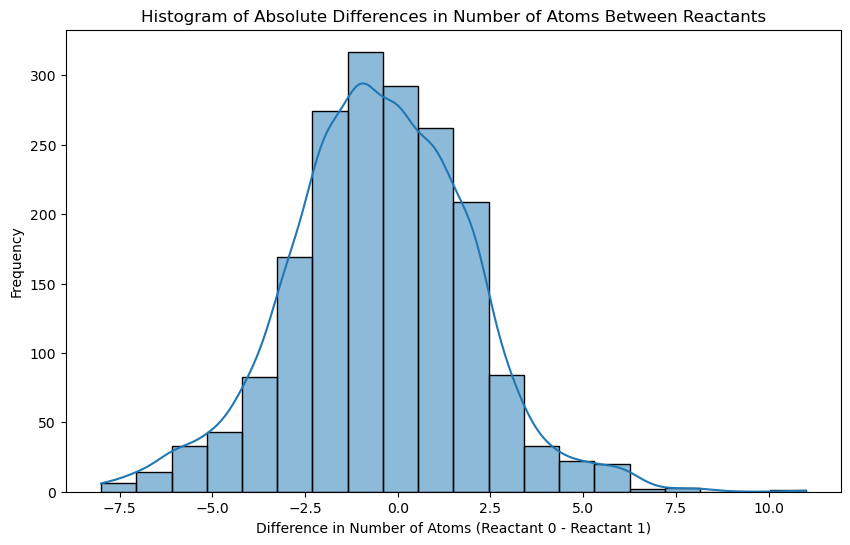

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(features_df['atoms_diff_abs'].dropna(), bins=20, kde=True)
plt.title('Histogram of Absolute Differences in Number of Atoms Between Reactants')
plt.xlabel('Difference in Number of Atoms (Reactant 0 - Reactant 1)')
plt.ylabel('Frequency')
plt.show()